# 13 Variable Selection in High Dimensional Analysis

Assume there are $p$ features and $n$ samples. However $n\ll p$. We need to find out which features are most related. 

For example, finding out which genes contribute to a certain disease or pruning a neural network...

## Best Subset Selection


Shortage: 

1. Best subset selection change discontinuously when changing the subset size.
2. The problem is not convex and is very hard to solve.

## LASSO

LASSO (Least Absolute Shrinkage and Selection Operator) is solving for

$$\min\left\{\frac12\Vert y -X\beta\Vert_2^2+\lambda \Vert \beta\Vert_1\right\}.$$

and the minimizer is denoted by $\hat\beta(\lambda)\ (\lambda>0)$. Sometimes we use $\min\left\{\frac{1}{2n}\Vert y -X\beta\Vert_2^2+\lambda \Vert \beta\Vert_1\right\}$.

### Subdifferential

LASSO is convex and we require the subdifferential condition to hold at minimizer $\hat\beta$:

$$\left\{\begin{array}{cc}x_j^T(y - X\hat\beta) = \lambda\cdot {\rm sgn}\hat\beta_j &\quad \hat\beta_j\neq 0\\ |x_j^T(y - X\hat\beta)|\leqslant \lambda & \quad \hat\beta_j = 0\end{array}\right.$$

See further theory of subdifferential in the course \<Optimization\>.

### Geometric Projection



Contour of Loss Function = 3(x-2)^2+3(y-3)^2-5(x-2)(y-3)
touches the constraint |x| + |y| = 1 at (0, 1).


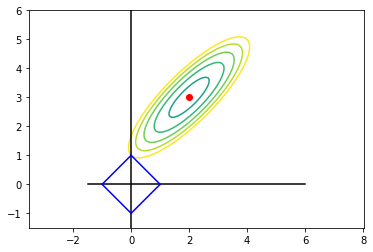

In [38]:
import numpy as np
from matplotlib import pyplot as plt

x, y = np.meshgrid(np.linspace(-1.5, 6, 100), np.linspace(-1.5, 6, 100))
z = 3*(x-2)**2+3*(y-3)**2-5*(x-2)*(y-3)

print('Contour of Loss Function = 3(x-2)^2+3(y-3)^2-5(x-2)(y-3)')
print('touches the constraint |x| + |y| = 1 at (0, 1).')

plt.contour(x, y, z, levels = np.linspace(-4, 4, 10))
plt.plot(2, 3, 'ro')
plt.plot([x.min(), x.max()], [0, 0], 'k')
plt.plot([0, 0], [y.min(), y.max()], 'k')
# plot |x|+|y| = 1
plt.plot([0, 1], [1, 0], 'blue')
plt.plot([1, 0], [0, -1], 'blue')
plt.plot([0, -1], [1, 0], 'blue')
plt.plot([-1, 0], [0, -1], 'blue')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.axis('equal')
plt.show()

### Piecewise Linear Solution Path

Let the regularization parameter $\lambda$ in LASSO vary from $[0,\infty)$, then the solution $\hat\beta_{\rm LASSO}(\lambda)$ is piecewise linear with respect to $\lambda$. We call it the solution path.

As for extreme cases, when $\lambda\rightarrow +\infty$, the penalty is too large and the best solution is $\hat\beta_{\rm LASSO}(\lambda)=0$. In this case, all entries are zero and the solution is sparse.

When $\lambda=0$, the problem dengerates to OLS and the solution is $\hat\beta_{\rm LASSO}(\lambda)=\hat\beta_{\rm LS}$. In this case, all entries are (generally) nonzero and the solution is dense.

<br>

When $\lambda$ increases from $0$ to $+\infty$, the solution path is piecewise linear and the solution is getting sparse piecewise.

The last entry that vanishes to zero is the most important feature. The first entry that vanishes to zero is the least important feature. We can use such property to do variable selection.

beta = [-1.16514984  0.90082649  0.46566244 -1.53624369]


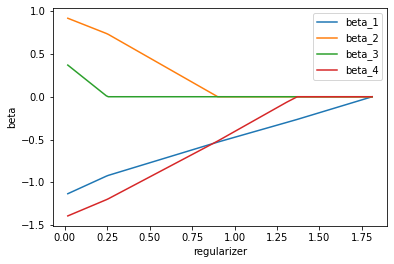

In [52]:
from sklearn.linear_model import lasso_path
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
X = np.random.randn(20, 4)
beta = np.random.randn(4)
y = X.dot(beta) + np.random.randn(20) * 0.3

def plot_lasso_path(X, y):
    k = X.shape[1]
    path = lasso_path(X, y, eps = 0.01, fit_intercept = False)
    for i in range(k):
        plt.plot(path[0], path[1][i], label = 'beta_{}'.format(i+1))
    plt.xlabel('regularizer')
    plt.ylabel('beta')
    plt.legend()

print('beta = {}'.format(beta))
plot_lasso_path(X, y)

### Support Recovery

Assume following conditions: 

1. Mutual Incorherence: $\Vert (X_S^TX_S)^{-1} X_S^TX_j\Vert_1^2\leqslant 1 -\gamma$ for all $j\in S$.
2. Minimum Eigenvalue: $\lambda_{\rm min}(\frac 1n X_S^TX_S)\geqslant C>0$
3. Minimum Singular Values:

## Linearized Bregman Iteration



### Split LBI

The condition is weaker than that required in LASSO, so it often outperforms LASSO.

## References

[1] Dalalyan Arnak, Hebiri Mohamed, Lederer Johannes. [On the Prediction Performance of the Lasso](https://www.researchgate.net/publication/260107907_On_the_Prediction_Performance_of_the_Lasso), 2014.